In [1]:
#Importing needed packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data

from astropy.wcs import WCS
from astropy import wcs
import sys

#from spectral_cube import SpectralCube





In [2]:
#Calling FITS file for BHR co

location = "/Users/RuheeJanmohamed/Desktop/Data/member.uid___A001_X11f_X6.co.image.fits"

hdul = fits.open(location)



In [3]:
# Header

hdu = hdul[0]

hdu.header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  450                                                  
NAXIS2  =                  450                                                  
NAXIS3  =                  600                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   4.362102018462E-04                                                  
BMIN    =   3.958726922671E-04                                                  
BPA     =  -7.407207489014E+

In [4]:
#Finding shape of data

im_data = hdu.data
im_data.shape

(1, 600, 450, 450)

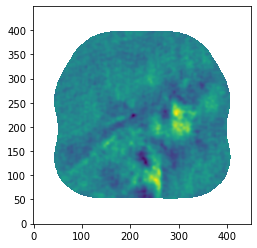

In [5]:
# Plotting a slice of the spectral cube

plt.imshow(im_data[0,300,:,:],origin='lower')



In [68]:
#Defining the array needed for the Moment 0 and Moment 1 maps

image_slab = np.copy(im_data[0,200:400,:,:])
image_slab2 = np.nan_to_num(np.moveaxis(image_slab, 0, -1))

print(image_slab2.shape)

channel = np.arange(200.0,400.0)
image_slab2[image_slab2 < 0.25] = 0.0

velocity = np.linspace(-10,10,200)




(450, 450, 200)


(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        3.896478e+07, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.013680e+05, 2.353660e+05,
        1.939670e+05, 1.631260e+05, 1.383720e+05, 1.161530e+05,
        9.786400e+04, 8.222600e+04, 6.880200e+04, 5.659200e+04,
        4.754200e+04, 3.994900e+04, 3.394300e+04, 2.769000e+04,
        2.243500e+04, 1.811500e+04, 1.499700e+04, 1.234000e+04,
        1.005600e+04]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0

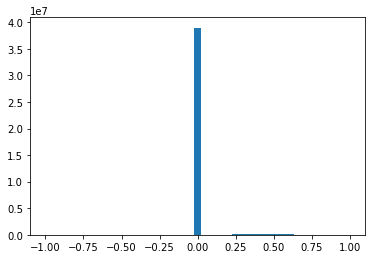

In [69]:
#Histogram showing data with noise cancelled out

plt.hist(image_slab2.flat, bins=np.linspace(-1,1))

Text(0.5, 1.0, 'Moment 0 map of CO for BHR')

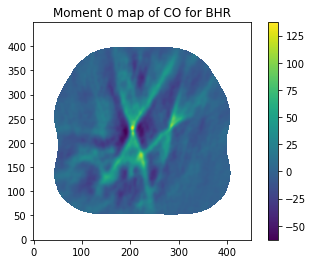

In [112]:
#Moment 0 map
#Shows the integrated value of the spectrum
#The specific range excludes the 
mom0 = np.sum(image_slab, axis=0)

#Normally the map is upside down. The origin = lower code flips it
plt.imshow(mom0[:,:],origin='lower')
plt.colorbar()
plt.title("Moment 0 map of CO for BHR")

(450, 450)


Text(0.5, 1.0, 'Moment 1 map of CO for BHR')

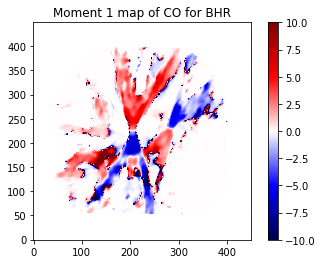

In [121]:
# Moment 1 map showing velocity field

mom1 = np.sum(image_slab2*velocity, axis=2)/mom0

print(mom1.shape)


plt.imshow(mom1[:,:],origin='lower', vmin = -10, vmax=10, cmap="seismic")
plt.colorbar()
plt.title("Moment 1 map of CO for BHR")

In [76]:
# Importing BHR 13co

location_13co = "/Users/RuheeJanmohamed/Desktop/Data/member.uid___A001_X11f_X6.13co.image.fits"

hdul_13co = fits.open(location_13co)



In [77]:
# Header for 13co

hdu_13co = hdul_13co[0]

hdu_13co.header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  450                                                  
NAXIS2  =                  450                                                  
NAXIS3  =                  100                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   4.568934109476E-04                                                  
BMIN    =   4.128995537758E-04                                                  
BPA     =  -7.292063140869E+

In [78]:
# Shape of data

data_13co = hdu_13co.data
data_13co.shape

(1, 100, 450, 450)

Text(0.5, 1.0, 'Spectral Slice of CO for BHR')

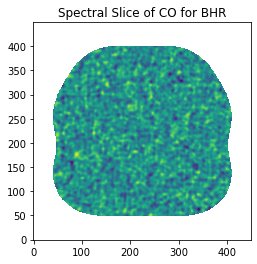

In [113]:
#Plotting slice of 13co spectral cube

plt.imshow(data_13co[0,99,:,:],origin='lower')

plt.title("Spectral Slice of CO for BHR")

In [96]:
#Defining the array needed for the Moment 0 and Moment 1 maps for 13co

image_slab_13co = np.copy(data_13co[0,20:70,:,:])
image_slab2_13co = np.nan_to_num(np.moveaxis(image_slab_13co, 0, -1))

print(image_slab2_13co.shape)

channel = np.arange(20.0,80.0)
image_slab2_13co[image_slab2_13co < 0.25] = 0.0

velocity_13co = np.linspace(-15,15,50)



(450, 450, 50)


(450, 450)

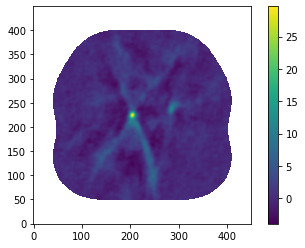

In [91]:
#Moment 0 map for 13co

mom0_13co = np.sum(image_slab_13co, axis=0)

#Normally the map is upside down. The origin = lower code flips it
plt.imshow(mom0_13co[:,:],origin='lower')
plt.colorbar()
mom0_13co.shape

(450, 450)


Text(0.5, 1.0, 'Moment 1 map of 13CO for BHR')

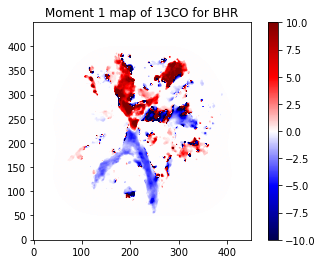

In [120]:
# Moment 1 map showing velocity field for 13co

mom1_13co = np.sum(image_slab2_13co*velocity_13co, axis=2)/mom0_13co

print(mom1_13co.shape)


plt.imshow(mom1_13co[:,:],origin='lower', vmin = -10, vmax=10, cmap="seismic")
plt.colorbar()
plt.title("Moment 1 map of 13CO for BHR")

In [122]:
# Importing BHR c18o

location_c18o = "/Users/RuheeJanmohamed/Desktop/Data/member.uid___A001_X11f_X6.c18o.image.fits"

hdul_c18o = fits.open(location_13co)


In [123]:
# Header for c18o

hdu_c18o = hdul_c18o[0]

hdu_c18o.header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  450                                                  
NAXIS2  =                  450                                                  
NAXIS3  =                  100                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   4.568934109476E-04                                                  
BMIN    =   4.128995537758E-04                                                  
BPA     =  -7.292063140869E+

In [103]:
# Shape of data

data_c18o = hdu_c18o.data
data_c18o.shape

(1, 100, 450, 450)

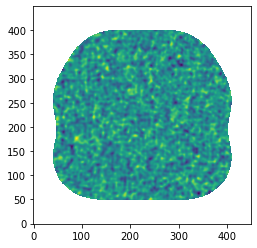

In [104]:
#Plotting slice of 13co spectral cube

plt.imshow(data_c18o[0,99,:,:],origin='lower')



In [108]:
#Defining the array needed for the Moment 0 and Moment 1 maps for c18o

image_slab_c18o = np.copy(data_c18o[0,20:70,:,:])
image_slab2_c18o = np.nan_to_num(np.moveaxis(image_slab_c18o, 0, -1))

print(image_slab2_c18o.shape)

channel = np.arange(20.0,80.0)
image_slab2_c18o[image_slab2_c18o < 0.25] = 0.0

velocity_c18o = np.linspace(-10,10,50)



(450, 450, 50)


(450, 450)

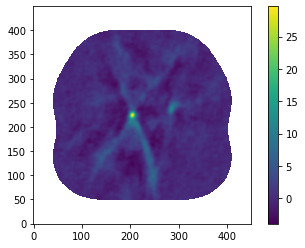

In [106]:
#Moment 0 map

mom0_c18o = np.sum(image_slab_c18o, axis=0)

#Normally the map is upside down. The origin = lower code flips it
plt.imshow(mom0_c18o[:,:],origin='lower')
plt.colorbar()
mom0_c18o.shape

(450, 450)


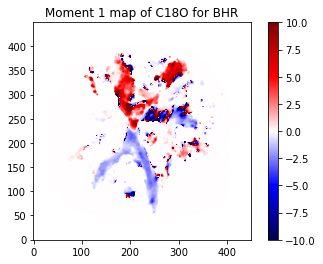

In [119]:
# Moment 1 map showing velocity field for 13co

mom1_c18o = np.sum(image_slab2_c18o*velocity_c18o, axis=2)/mom0_c18o

print(mom1_c18o.shape)

plt.title("Moment 1 map of C18O for BHR")
plt.imshow(mom1_c18o[:,:],origin='lower', vmin = -10, vmax=10, cmap="seismic")
plt.colorbar()
